In [6]:
#anomaly detection with isolation forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix


In [7]:
#read data
df = pd.read_csv('../../data/m16_cpu_usage_v2_10minutes.csv')
df['time'] = pd.to_datetime(df['time'])

In [8]:
df.head()

,time,machine_id,cpu_util
0,2017-10-03 00:00:00,m16,0.300000
1,2017-10-03 00:10:00,m16,0.340000
2,2017-10-03 00:20:00,m16,0.253333
3,2017-10-03 00:30:00,m16,0.200000
4,2017-10-03 00:40:00,m16,0.200000


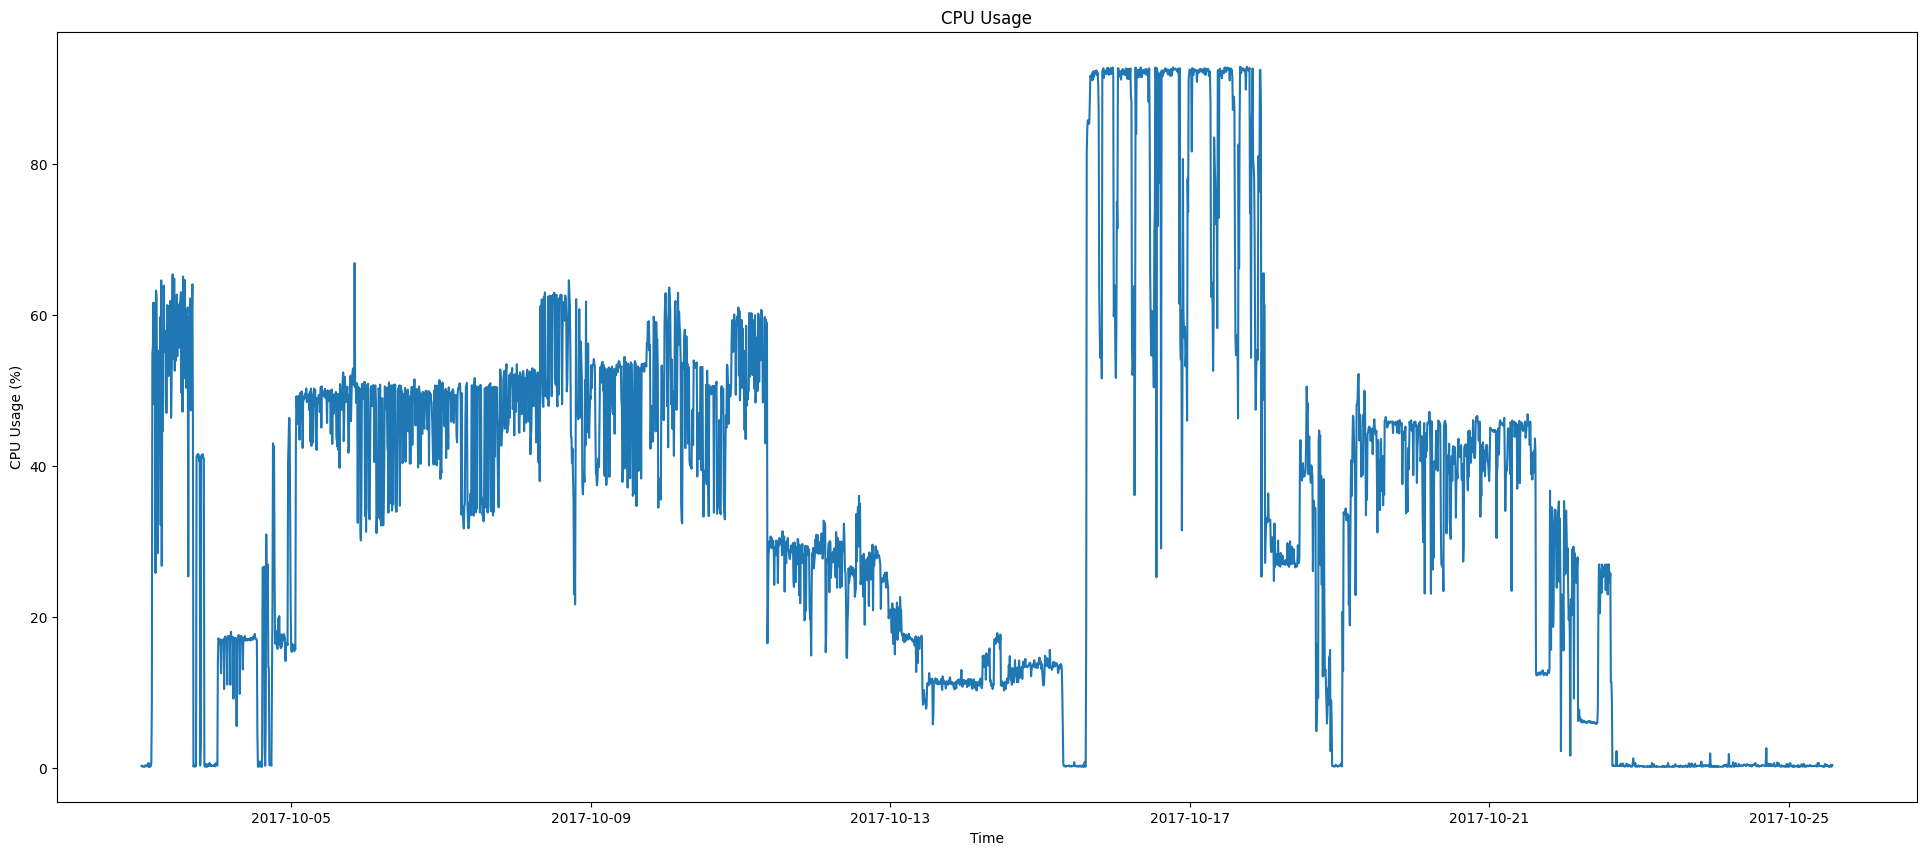

In [14]:
#plot data
plt.figure(figsize=(24, 10))
plt.plot(df['time'], df['cpu_util'])
plt.title('CPU Usage')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['cpu_util']])
X.shape

(3253, 1)

In [31]:
#train model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.5), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(X)

IsolationForest(contamination=0.5, n_jobs=-1, random_state=42)

In [38]:
#predict anomaly
df['anomaly'] = pd.Series(model.predict(X))
df['anomaly'] = df['anomaly'].map( {1: 0, -1: 1} )
print(df['anomaly'].value_counts())

0    1627
1    1626
Name: anomaly, dtype: int64


In [39]:
df.head()

,time,machine_id,cpu_util,anomaly
0,2017-10-03 00:00:00,m16,0.300000,0
1,2017-10-03 00:10:00,m16,0.340000,0
2,2017-10-03 00:20:00,m16,0.253333,1
3,2017-10-03 00:30:00,m16,0.200000,0
4,2017-10-03 00:40:00,m16,0.200000,0


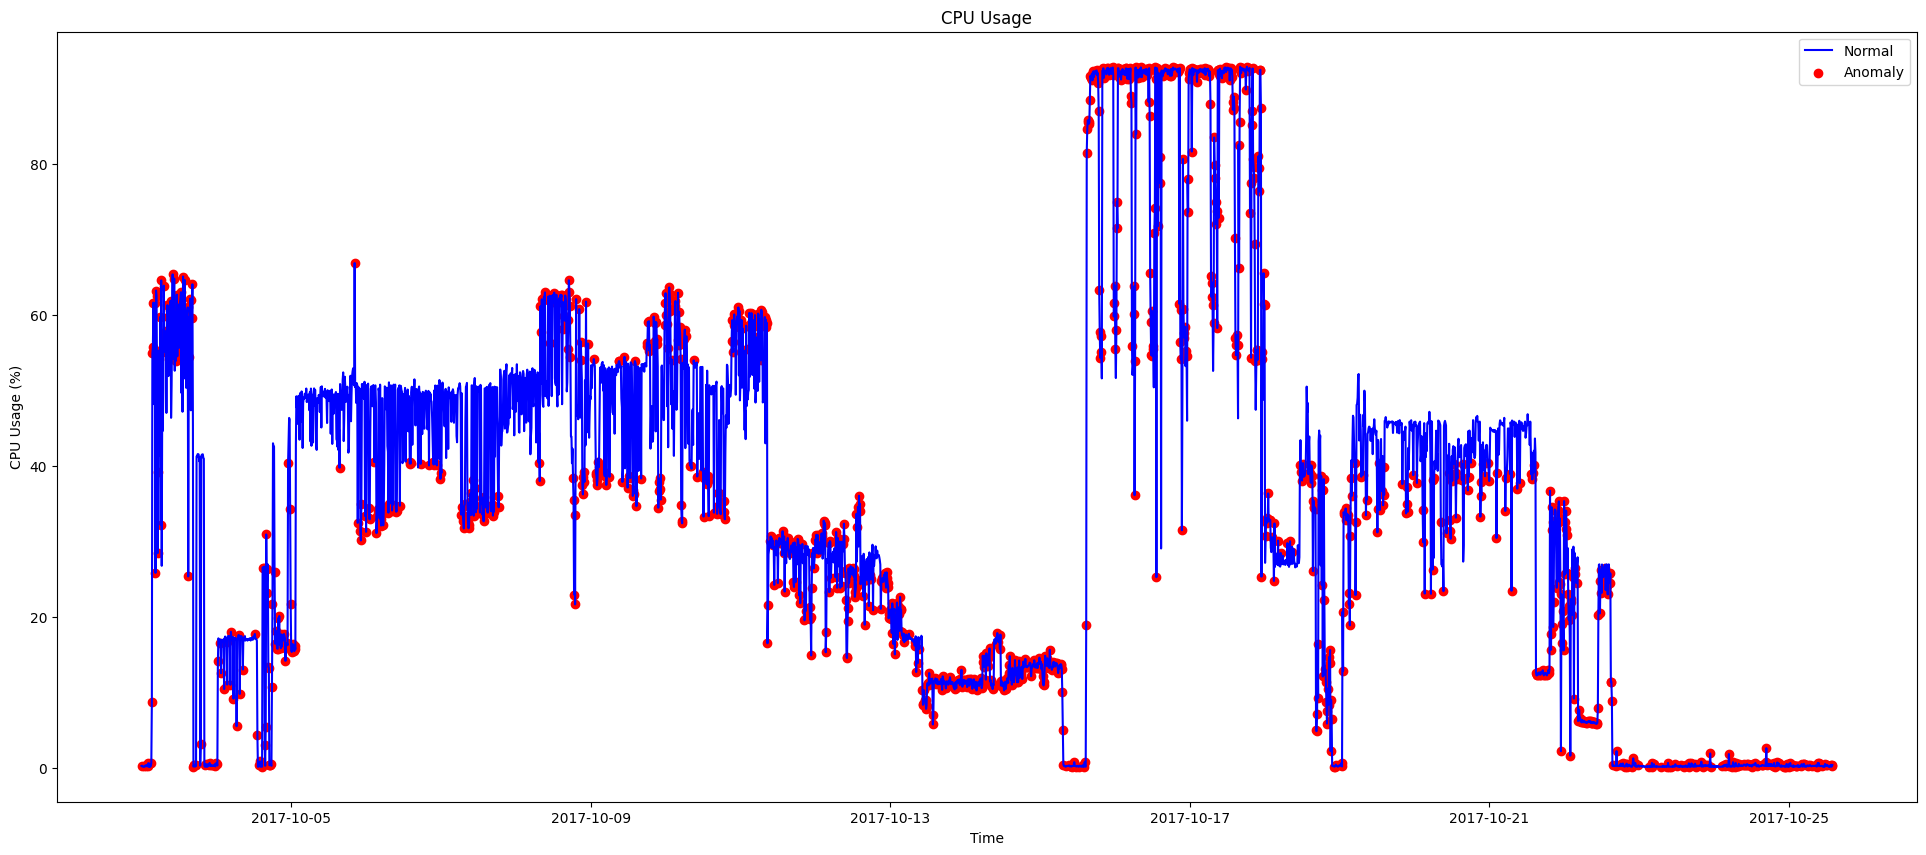

In [40]:
#plot anomalies
a = df.loc[df['anomaly'] == 1, ['time', 'cpu_util']] #anomaly

plt.figure(figsize=(24, 10))
plt.plot(df['time'], df['cpu_util'], color='blue', label = 'Normal')
plt.scatter(a['time'],a['cpu_util'], color='red', label = 'Anomaly')
plt.title('CPU Usage')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.legend()
plt.show()